In [1]:
from __future__ import print_function

In [2]:
import notebook
#notebook.nbextensions.check_nbextension("usability/python-markdown/", user = True)
E = notebook.nbextensions.EnableNBExtensionApp()
E.enable_nbextension("usability/python-markdown/main")

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

#Machine Learning Engineer Nanodegree

##Project 3: Creating Customer Segments

In [4]:
import numpy as np

np.random.seed(0)

In [5]:
import pandas as pd

data = pd.read_csv("data/wholesale-customers.csv")

###Introduction

This documents presents the results for the third project within the Machine Learning Engineer Nanodegree program. This assessment required the student to apply dimensionality reduction and classification techniques to a set of sales data from a wholesale grocery distributor, in order to categorize its customers into segments. 

###Data

In [6]:
print("Table 1: Raw Dataset (first 5 records)")
data.head(5)

Table 1: Raw Dataset (first 5 records)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [7]:
data_nrows = data.shape[0]
data_ncols = data.shape[1]

print("Dataset rows:", data_nrows)
print("Dataset columns:", data_ncols)

Dataset rows: 440
Dataset columns: 6


This assessment uses data provided via the Udacity platform. The dataset has {{data_nrows}} rows and {{data_ncols}} columns.

###Question 1

Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

####Answer

Under the PCA method, the first dimension will show the global direction of the data (maximum variance). According the dataset variance's shown below, it may be reasonable to suggest that the first component will carry a high load of the 'Fresh' feature since it has the highest variance.

In [8]:
import pandas as pd
import numpy as np

data_std = data.std(axis=0)
df_data_std = pd.DataFrame(data_std).T
df_data_std = np.round(df_data_std, 3)
df_data_std.index = ["std dev"]

print("Table 2: Raw Dataset Statistics")
df_data_std

Table 2: Raw Dataset Statistics


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
std dev,12647.329,7380.377,9503.163,4854.673,4767.854,2820.106


ICA instead finds subcomponents according to which are statistically independent. Under this premise, it may be reasonable to suggest that the ICA method may also find 'Fresh' to be one of its components, however it is difficult to say which remaining components it would select as the components need not be orthogonal in the feature space, as opposed to PCA.

###Question 2

How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

####Answer

Fit PCA.

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)

PCA(copy=True, n_components=6, whiten=False)

Show PCA components.

In [10]:
import pandas as pd
import numpy as np

#print(pca.components_)
pca_components_header = ["fresh",
                         "milk",
                         "grocery",
                         "frozen",
                         "detergentspaper",
                         "delicatessen"]

df_pca_components = pd.DataFrame(pca.components_, columns = pca_components_header)
df_pca_components = np.round(df_pca_components, 3)

print("Table 3: PCA Components")
df_pca_components

Table 3: PCA Components


,fresh,milk,grocery,frozen,detergentspaper,delicatessen
0,-0.977,-0.121,-0.062,-0.152,0.007,-0.068
1,-0.111,0.516,0.765,-0.019,0.365,0.057
2,-0.179,0.510,-0.276,0.714,-0.204,0.283
3,-0.042,-0.646,0.375,0.646,0.149,-0.020
4,0.016,0.203,-0.160,0.220,0.208,-0.917
5,-0.016,0.033,0.411,-0.013,-0.871,-0.265


In [11]:
pca_component_11 = format(pca.components_[0][0], ".4f")
pca_component_12 = format(pca.components_[0][1], ".4f")
pca_component_13 = format(pca.components_[0][2], ".4f")
pca_component_14 = format(pca.components_[0][3], ".4f")
pca_component_15 = format(pca.components_[0][4], ".4f")
pca_component_16 = format(pca.components_[0][5], ".4f")
pca_component_21 = format(pca.components_[1][0], ".4f")
pca_component_22 = format(pca.components_[1][1], ".4f")
pca_component_23 = format(pca.components_[1][2], ".4f")
pca_component_24 = format(pca.components_[1][3], ".4f")
pca_component_25 = format(pca.components_[1][4], ".4f")
pca_component_26 = format(pca.components_[1][5], ".4f")

Calculate PCA dimensions.

In [12]:
import pandas as pd
import numpy as np

#print(pca.explained_variance_ratio_)
pca_dimension_header = ["dimension1",
                        "dimension2",
                        "dimension3",
                        "dimension4",
                        "dimension5",
                        "dimension6"]

df_pca_dimension = pd.DataFrame([[pca.explained_variance_ratio_[0],
                                  pca.explained_variance_ratio_[1],
                                  pca.explained_variance_ratio_[2],
                                  pca.explained_variance_ratio_[3],
                                  pca.explained_variance_ratio_[4],
                                  pca.explained_variance_ratio_[5]]], columns = pca_dimension_header)
df_pca_dimension = np.round(df_pca_dimension, 3)

print("Table 4: PCA Dimensions")
df_pca_dimension

Table 4: PCA Dimensions


,dimension1,dimension2,dimension3,dimension4,dimension5,dimension6
0,0.46,0.405,0.07,0.044,0.015,0.006


Plot the expected variance ratio for each component.

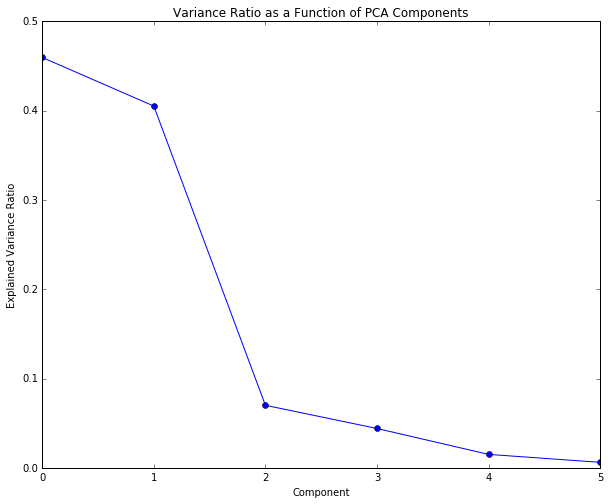

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,8))
plt.plot(list(pca.explained_variance_ratio_),"-o")
plt.title("Variance Ratio as a Function of PCA Components")
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Component")
plt.show()

In [14]:
pca_var_1 = format(pca.explained_variance_ratio_[0], ".4f")
pca_var_2 = format(pca.explained_variance_ratio_[1], ".4f")
pca_var_3 = format(pca.explained_variance_ratio_[2], ".4f")
pca_varsum_12 = format(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1], ".4f")
pca_vardrop_23 = format(pca.explained_variance_ratio_[2] / pca.explained_variance_ratio_[1], ".4f")

The variance ratio of the first two dimensions are {{pca_var_1}} and {{pca_var_2}} respectively, resulting in {{pca_varsum_12}} of the variance being along the first two dimensions. The variance along the third dimension is only {{pca_var_3}}, which is a {{pca_vardrop_23}} drop relative to the second dimension. We should therefore keep only the first two dimensions for our analysis. This will help to avoid the curse of dimensionality.

Interpreting these results allows us to form an initial impression about the customer segments contained in the data. One possibility could be that many customers are able to be split into customers ordering mainly 'Fresh' items versus customers ordering ordering 'Grocery', 'Milk' and 'Detergents'.

###Question 3

What do the dimensions seem to represent? How can you use this information?

####Answer

These dimensions are linear combinations of the datasets five features. We can read off these linear combinations from the pca component array shown above.

Observing the first row, we see that the first dimension is almost completely (anti-) aligned along the 'Fresh' direction ({{pca_component_11}}) and slightly in the 'Milk' direction ({{pca_component_12}}) and the 'Frozen' direction ({{pca_component_14}}). It is almost orthogonal to the other directions. Note however, although these features are (anti-) aligned over this dimension, the prevalence of that feature in the component is represented in terms of absolute magnitude and changing the signs of the components, does not change the variance. As such, we can make the statement that the first dimension contains data mostly on 'Fresh' foods, and to a lessor extent, 'Milk' and 'Frozen' foods.

Observing the second row, we see that the second dimension is most strongly aligned in the 'Grocery' direction ({{pca_component_23}}) followed by the 'Milk' direction ({{pca_component_22}}) and 'Detergents_paper' direction ({{pca_component_25}}), and slightly in the 'Fresh' direction ({{pca_component_21}}). It is almost orthogonal to the other directions. Therefore, the second dimension contains data mostly on 'Grocery', 'Milk', and to a lessor extent, 'Detergents_paper'.

Below shows a plot of the first two PCA dimensions discussed above.

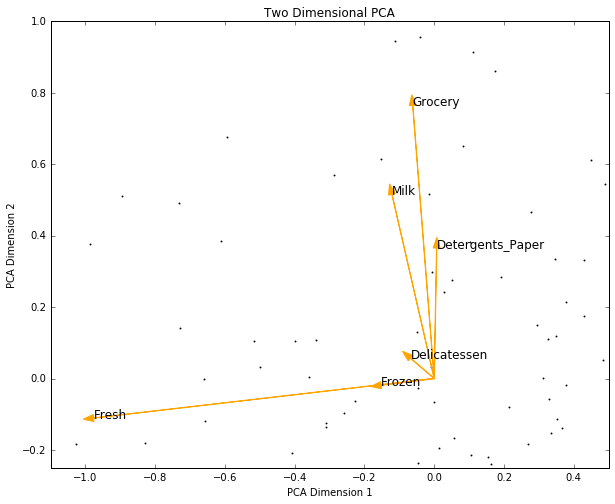

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

pca2 = PCA(n_components=2, whiten=True).fit(data)

df_pca2 = pd.DataFrame(pca2.transform(data), columns=['PC1', 'PC2'])

df_pca2.plot(kind='scatter', x='PC1', y='PC2', figsize=(10, 8), s=0.8)

for i, (pc1, pc2) in enumerate(
    zip(pca2.components_[0], pca2.components_[1])):
    plt.arrow(0, 0, pc1, pc2, width=0.001, fc='orange', ec='orange')
    plt.annotate(data.columns[i], (pc1, pc2), size=12)

plt.title("Two Dimensional PCA")
plt.ylabel("PCA Dimension 2")
plt.xlabel("PCA Dimension 1")
plt.xlim([-1.1, .5])
plt.ylim([-.25, 1])
plt.show()

PCA allows us to reduce the dimensions of the data whilst maintaining most of the information. In this way, PCA allows us to make an assessment of which variables matter the most as we progress to building our classification model. From the plot above, we can see that over these dimensions, 'Fresh', 'Milk' and 'Grocery' are the highest uncorrelated components.

###Question 4

For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

####Answer

Fit ICA.

In [16]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=6)
ica.fit(data)

FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
    n_components=6, random_state=None, tol=0.0001, w_init=None,
    whiten=True)

Show ICA components.

In [17]:
import pandas as pd
import numpy as np

#print(ica.components_)
ica_components_header = ["fresh",
                         "milk",
                         "grocery",
                         "frozen",
                         "detergentspaper",
                         "delicatessen"]

df_ica_components = pd.DataFrame(ica.components_, columns = ica_components_header)
df_ica_components = np.round(df_ica_components, 8)*10**5

print("Table 5: ICA Components (10^5)")
df_ica_components

Table 5: ICA Components (10^5)


,fresh,milk,grocery,frozen,detergentspaper,delicatessen
0,-0.396,0.095,0.047,0.071,-0.160,0.103
1,0.030,-0.104,-1.365,0.132,2.778,0.538
2,-0.039,-0.031,-0.061,-0.053,0.044,1.818
3,-0.022,0.699,-0.527,-0.076,-0.460,-0.332
4,-0.034,-0.746,0.252,0.008,-0.401,0.536
5,-0.086,-0.019,0.087,1.115,-0.060,-0.594


In [18]:
ica_component_1 = ica.components_[0]
ica_component_11 = format(ica.components_[0][0]*10**5, ".4f")
ica_component_12 = format(ica.components_[0][1]*10**5, ".4f")
ica_component_13 = format(ica.components_[0][2]*10**5, ".4f")
ica_component_14 = format(ica.components_[0][3]*10**5, ".4f")
ica_component_15 = format(ica.components_[0][4]*10**5, ".4f")
ica_component_16 = format(ica.components_[0][5]*10**5, ".4f")

ica_component_2 = ica.components_[1]
ica_component_21 = format(ica.components_[1][0]*10**5, ".4f")
ica_component_22 = format(ica.components_[1][1]*10**5, ".4f")
ica_component_23 = format(ica.components_[1][2]*10**5, ".4f")
ica_component_24 = format(ica.components_[1][3]*10**5, ".4f")
ica_component_25 = format(ica.components_[1][4]*10**5, ".4f")
ica_component_26 = format(ica.components_[1][5]*10**5, ".4f")

ica_component_3 = ica.components_[2]
ica_component_31 = format(ica.components_[2][0]*10**5, ".4f")
ica_component_32 = format(ica.components_[2][1]*10**5, ".4f")
ica_component_33 = format(ica.components_[2][2]*10**5, ".4f")
ica_component_34 = format(ica.components_[2][3]*10**5, ".4f")
ica_component_35 = format(ica.components_[2][4]*10**5, ".4f")
ica_component_36 = format(ica.components_[2][5]*10**5, ".4f")

ica_component_4 = ica.components_[3]
ica_component_41 = format(ica.components_[3][0]*10**5, ".4f")
ica_component_42 = format(ica.components_[3][1]*10**5, ".4f")
ica_component_43 = format(ica.components_[3][2]*10**5, ".4f")
ica_component_44 = format(ica.components_[3][3]*10**5, ".4f")
ica_component_45 = format(ica.components_[3][4]*10**5, ".4f")
ica_component_46 = format(ica.components_[3][5]*10**5, ".4f")

Observing the first row, we see that the first vector has a high representation of the 'Fresh' feature, with a coefficient of {{ica_component_11}}. The other features have weaker representation on the first dimension.

Observing the second row, we see that the second vector has a high representation of both 'Grocery' and 'Detergents paper', however the coefficients of each are of different polarity ({{ica_component_23}} and {{ica_component_25}} respectively). This indicates that, with all else held equal, high spending in 'Grocery' is associated with low spending in 'Detergents paper', and visa versa.

Observing the third row, we see that the third vector has a high representation of the 'Delicatessen' feature, with a negative coefficient of {{ica_component_36}}. Indicating low spending on this feature within the vector.

Finally, observing the forth row, we see that the forth vector has a high representation of the 'Milk' feature, with a positive coefficient of {{ica_component_42}}. Indicating high spending on this feature within the vector.

Below shows a plot of each vector of the ICA.

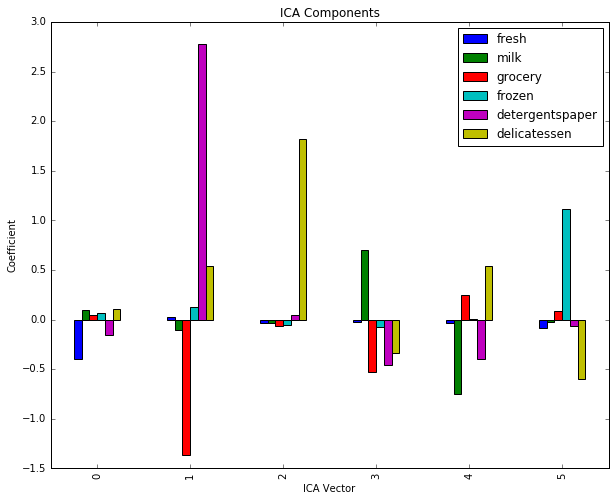

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

df_ica_components.plot(kind='bar', figsize=(10, 8))

plt.title("ICA Components")
plt.ylabel("Coefficient")
plt.xlabel("ICA Vector")
plt.show()

Like with the PCA analysis shown above, interpreting these results allows us to form an initial impression about the customer segments contained in the data by showing which variables matter the most.

###Question 5

What are the advantages of using K Means clustering or Gaussian Mixture Models?

####Answer

Gaussian Mixture Models (GMMs) make a probabilistic assignment of points to classes, whereas K Means makes a deterministic assignment.

An advantage of GMMs is that prior uncertainty about the assignment of a point to a cluster can be inherently reflected in the probabilistic model (soft assignment). Therefore, a GMM would be more suitable if the underlying dataset is a representation of a mixture of Gaussians. Alternatively, if cluster assignments are expected to be deterministic, a K Means clustering algorithm has advantages.

It is worth noting, when assessing computation speed, the EM algorithm with Gaussian mixtures is generally slightly slower than Lloyd's algorithm for K Means, since computing the normal probability (EM) is generally slower than computing the L2-norm (K Means).

Since there is nothing to suggest that this data has been formed from a mixture of normals, and the goal of this assessment is to discretely characterise customers (not to assign probabilities), K Means would be a more suitable algorithm to apply.

###Question 6

Generate a cluster visualization of the data.

####Answer

Fit PCA with two components.

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)

PCA(copy=True, n_components=2, whiten=False)

Use PCA to transform the data under two components.

In [21]:
import pandas as pd
import numpy as np

reduced_data_header = ["component1",
                       "component2"]

reduced_data = pca.fit_transform(data)
df_reduced_data = pd.DataFrame(reduced_data, columns = reduced_data_header)
df_reduced_data = np.round(df_reduced_data, 3)

print("Table 6: PCA Reduced Data (first 5 records)")
df_reduced_data[:5]

Table 6: PCA Reduced Data (first 5 records)


,component1,component2
0,-650.022,1585.519
1,4426.805,4042.452
2,4841.999,2578.762
3,-990.346,-6279.806
4,-10657.999,-2159.726


Fit KMeans clustering algorithm with five clusters to the PCA reduced dataset.

In [22]:
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=5)
clusters.fit(reduced_data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

Find the centroids for KMeans clusters.

In [23]:
import pandas as pd
import numpy as np

centroids_header = ["component1",
                    "component2"]

centroids = clusters.cluster_centers_
df_centroids = pd.DataFrame(centroids, columns = centroids_header)
df_centroids = np.round(df_centroids, 3)

print("Table 7: Centoids for KMeans")
df_centroids[:5]

Table 7: Centoids for KMeans


,component1,component2
0,6399.712,-4169.297
1,-9052.400,-4808.559
2,5607.917,14199.180
3,-37704.642,-5488.354
4,-14537.718,61715.671


Plot the KMeans clusters with centoids over the PCA reduced dataset.

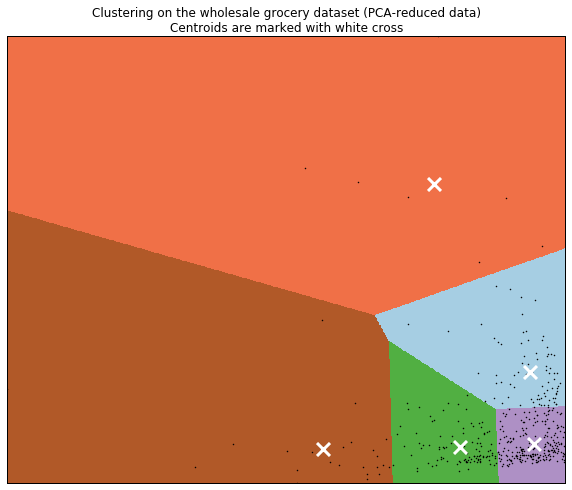

In [24]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

clusters = KMeans(n_clusters=5)
clusters.fit(reduced_data)
centroids = clusters.cluster_centers_

# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,8))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

We can also plot the KMeans clusters with centoids with a variable cluster number. See the plot below for a cluster size ranging from one to six.

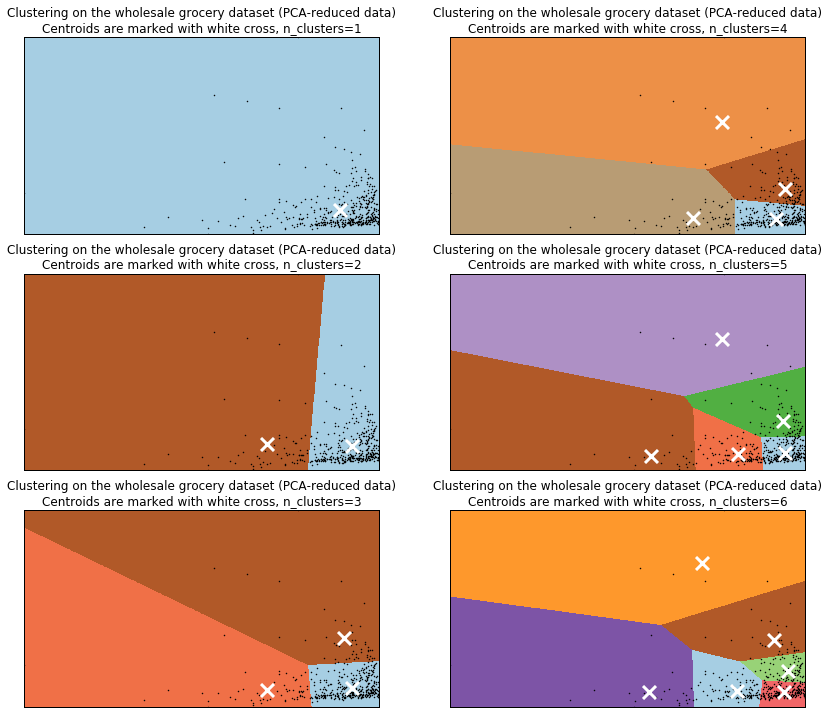

In [25]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (14, 12))
gs = gridspec.GridSpec(3, 2)

for i in range(0, 6):
    if i <= 2:
        ax = plt.subplot(gs[i, 0])
    else:
        ax = plt.subplot(gs[i-3, 1])

    clusters = KMeans(n_clusters=i+1)
    clusters.fit(reduced_data)
    centroids = clusters.cluster_centers_

    # Plot the decision boundary by building a mesh grid to populate a graph.
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    hx = (x_max-x_min)/1000.
    hy = (y_max-y_min)/1000.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
        
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')
    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross, n_clusters=' + str(i+1))
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    
    fig.add_subplot(ax)
    
plt.show()

The choice of three clusters seems to generally categorize the data, however choice of five clusters seems to a better job of classifying the tight cluster where the bulk of datapoints lie.

###Question 7

What are the central objects in each cluster? Describe them as customers.

####Answer

Convert centroids back to original space.

In [26]:
import pandas as pd
import numpy as np

#print(pca.inverse_transform(centroids))
converted_centoids_header = ["fresh",
                             "milk",
                             "grocery",
                             "frozen",
                             "detergentspaper",
                             "delicatessen"]

converted_centoids = pca.inverse_transform(centroids)
df_converted_centoids = pd.DataFrame(converted_centoids, columns = converted_centoids_header)
df_converted_centoids = np.round(df_converted_centoids, 3)
df_converted_centoids["total"] = df_converted_centoids.sum(axis=1)

print("Table 8: Converted Centroids")
df_converted_centoids

Table 8: Converted Centroids


,fresh,milk,grocery,frozen,detergentspaper,delicatessen,total
0,21796.211,4511.413,4925.148,4607.261,1089.284,1902.087,38831.404
1,4278.491,8251.415,12438.315,1857.691,5287.207,1404.009,33517.128
2,6737.047,2123.431,3219.601,2259.084,840.623,788.315,15968.101
3,24860.692,43833.949,61861.063,4977.669,27876.759,6880.809,170290.941
4,50021.119,7719.092,6274.136,9011.881,682.366,3834.436,77543.030
5,6593.445,17979.749,26340.779,2192.765,11770.138,2720.671,67597.547


In [27]:
converted_centoids_1 = converted_centoids[0]
converted_centoids_11 = format(converted_centoids[0][0], ".4f")
converted_centoids_12 = format(converted_centoids[0][1], ".4f")
converted_centoids_13 = format(converted_centoids[0][2], ".4f")
converted_centoids_14 = format(converted_centoids[0][3], ".4f")
converted_centoids_15 = format(converted_centoids[0][4], ".4f")
converted_centoids_16 = format(converted_centoids[0][5], ".4f")

converted_centoids_2 = converted_centoids[1]
converted_centoids_21 = format(converted_centoids[1][0], ".4f")
converted_centoids_22 = format(converted_centoids[1][1], ".4f")
converted_centoids_23 = format(converted_centoids[1][2], ".4f")
converted_centoids_24 = format(converted_centoids[1][3], ".4f")
converted_centoids_25 = format(converted_centoids[1][4], ".4f")
converted_centoids_26 = format(converted_centoids[1][5], ".4f")

converted_centoids_3 = converted_centoids[2]
converted_centoids_31 = format(converted_centoids[2][0], ".4f")
converted_centoids_32 = format(converted_centoids[2][1], ".4f")
converted_centoids_33 = format(converted_centoids[2][2], ".4f")
converted_centoids_34 = format(converted_centoids[2][3], ".4f")
converted_centoids_35 = format(converted_centoids[2][4], ".4f")
converted_centoids_36 = format(converted_centoids[2][5], ".4f")

converted_centoids_4 = converted_centoids[3]
converted_centoids_41 = format(converted_centoids[3][0], ".4f")
converted_centoids_42 = format(converted_centoids[3][1], ".4f")
converted_centoids_43 = format(converted_centoids[3][2], ".4f")
converted_centoids_44 = format(converted_centoids[3][3], ".4f")
converted_centoids_45 = format(converted_centoids[3][4], ".4f")
converted_centoids_46 = format(converted_centoids[3][5], ".4f")

These converted centoids can be used to represent five classified customer segments, along with their expenses under each feature.

Observing the first row, we see that the first customer spends the most on 'Fresh', followed by 'Grocery', {{converted_centoids_11}} and {{converted_centoids_13}} respectively. The same customer spends the least on 'Delicatessen', {{converted_centoids_16}}. This customer has the lowest spend of all five customer segments.

Observing the second row, we see that the second customer spends the most on 'Fresh', followed by 'Grocery', {{converted_centoids_21}} and {{converted_centoids_23}} respectively. The same customer spends the least on 'Detergents Paper', {{converted_centoids_25}}. This customer has the second highest spend of all five customer segments.

Observing the third row, we see that the third customer spends the most on 'Grocery', followed by 'Milk'. Observing the fourth row,  we see that the fourth customer spends the most on 'Frozen', followed by 'Fresh'. And finally, observing the fifth row, we see that the fifth customer spends the most on 'Milk' followed by 'Detergents Paper'.

###Question 8

Which of these techniques did you feel gave you the most insight into the data?

####Answer

The PCA data reduction technique in combination with K-means-clustering technique provided the most insight into the data. The PCA reduction technique was able to reduce the six features of the original dataset according to two components which maximize variance. This enabled the data to be clustered within a 2-dimensional space using a K-means-clustering technique.

By clustering the data and forming a number of customer segments, the client can now better disaggregate their customers by spending behaviour. Follow on analysis may attempt to draw relationships between spending behaviors of these customer segments. For example, of those customers who have a high total spend, which type of product do they spend the most on?

###Question 9

How would you use that technique to help the company design new experiments?

####Answer

If the client had plans to introduce or retire delivery strategies in the future, he or she could use the customer segmentation provided by the K-means technique in order to focus efforts on that specific segment. For example, the client could test whether a change in delivery strategy was able to shift item preferences for low spending customer segments from one particular item to another. The ability to understand preferences of each customer segment can help drive customer delivery experiences and ultimately improve customer experience.

###Question 10

How would you use that data to help you predict future customer needs?

####Answer

The client could for example, monitor changes in the spending behavior of each of these identified customer segments, and potentially introduce supervised learning techniques in order to predict changes in product demand. Doing so would provide the client with a competitive advantage in being able to lead changes (i.e. adjust inventories, investment and staff training) which suit shifting customer preferences.